In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset = pd.read_excel('Algerian_forest_fires_dataset_UPDATE.xlsx',header = 1)

In [11]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [13]:
dataset.shape

(247, 14)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [17]:
#Data Cleaning

In [21]:
dataset.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [23]:
dataset[dataset.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [25]:
#add new column = Region

In [33]:
dataset.loc[:122, "Region"] = 0
dataset.loc[123:, "Region"] = 1
df = dataset

In [35]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [37]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [47]:
df['Region'] = df[['Region']].astype(int)

In [49]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0,0


In [62]:
df = df.drop(['region'],axis = 1)

In [64]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,0
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 2 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      242 non-null    object
 14  Region       245 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 37.8+ KB


In [68]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [70]:
#remove the null values
df = df.dropna().reset_index(drop = True)

In [72]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [98]:
df.iloc[[120]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [102]:
df = df.drop(120).reset_index(drop = True)

In [104]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [106]:
df.shape

(241, 15)

In [108]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          241 non-null    object
 1   month        241 non-null    object
 2   year         241 non-null    object
 3   Temperature  241 non-null    object
 4   RH           241 non-null    object
 5   Ws           241 non-null    object
 6   Rain         241 non-null    object
 7   FFMC         241 non-null    object
 8   DMC          241 non-null    object
 9   DC           241 non-null    object
 10  ISI          241 non-null    object
 11  BUI          241 non-null    object
 12  FWI          241 non-null    object
 13  Classes      241 non-null    object
 14  Region       241 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.4+ KB


In [112]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          241 non-null    int32 
 1   month        241 non-null    int32 
 2   year         241 non-null    int32 
 3   Temperature  241 non-null    int32 
 4   RH           241 non-null    int32 
 5   Ws           241 non-null    int32 
 6   Rain         241 non-null    object
 7   FFMC         241 non-null    object
 8   DMC          241 non-null    object
 9   DC           241 non-null    object
 10  ISI          241 non-null    object
 11  BUI          241 non-null    object
 12  FWI          241 non-null    object
 13  Classes      241 non-null    object
 14  Region       241 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 21.8+ KB


In [116]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int32  
 1   month        241 non-null    int32  
 2   year         241 non-null    int32  
 3   Temperature  241 non-null    int32  
 4   RH           241 non-null    int32  
 5   Ws           241 non-null    int32  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.8+ KB


In [120]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,241.000000,241.000000,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,15.879668,7.514523,2012.0,32.178423,62.066390,15.493776,0.763900,77.948548,14.771369,49.778008,4.772199,16.798755,7.090041,0.502075
std,8.782442,1.110929,0.0,3.631648,14.886087,2.813835,2.010634,14.361392,12.404128,47.709963,4.158467,14.237473,7.447079,0.501036
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.600000,5.800000,14.700000,1.400000,6.100000,0.800000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,33.400000,3.500000,12.500000,4.700000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,74.000000,17.000000,0.500000,88.300000,20.900000,71.000000,7.300000,22.900000,11.600000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


EDA

In [125]:
df_copy = df.drop(['day','month','year'],axis = 1)

In [127]:
df_copy['Classes'].value_counts()

Classes
fire        137
not fire    104
Name: count, dtype: int64

In [131]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [133]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
1,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
2,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
3,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
4,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
236,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
237,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
238,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
239,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [135]:
df_copy.to_csv('algerian_forest.csv', index = False)

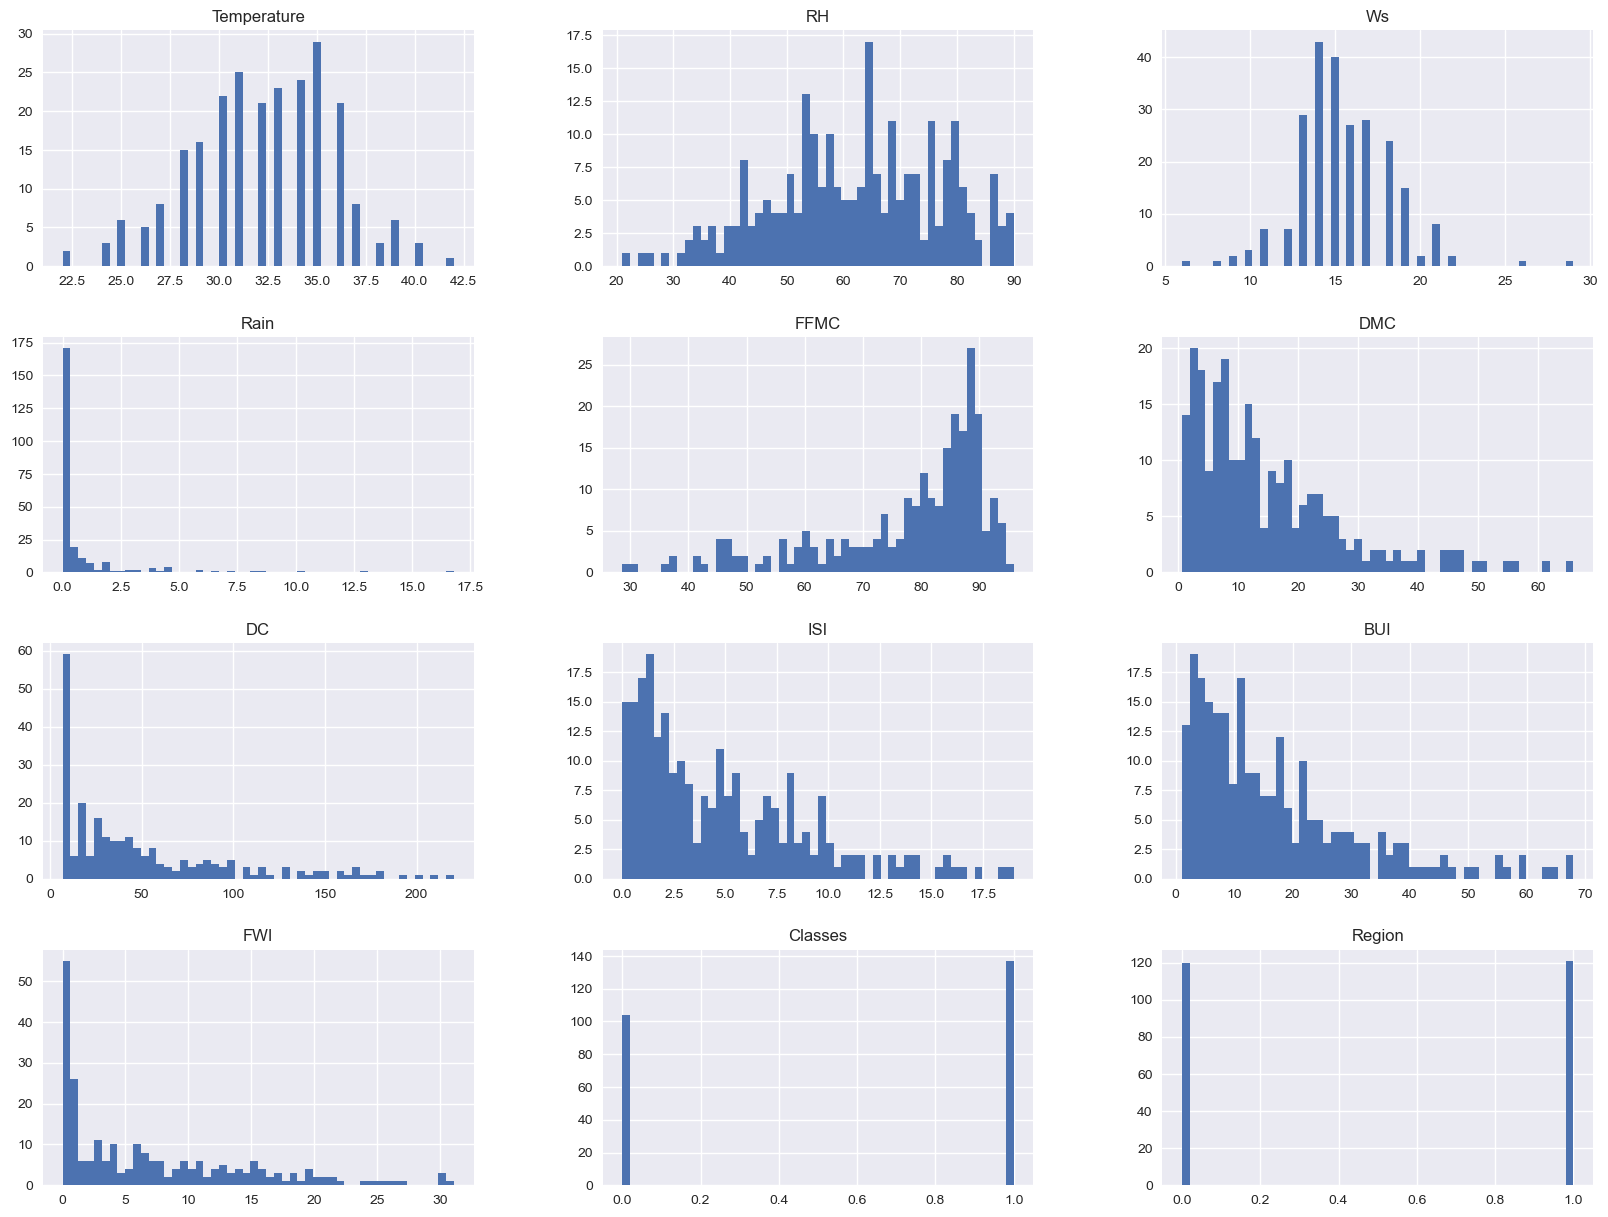

In [141]:
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50, figsize=(20,15))
plt.show()


In [143]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.655113,-0.286330,-0.328080,0.674474,0.482383,0.372295,0.601378,0.456186,0.563876,0.512160,0.264279
RH,-0.655113,1.000000,0.245910,0.222053,-0.648665,-0.411498,-0.229235,-0.690435,-0.356767,-0.584519,-0.436556,-0.406156
Ws,-0.286330,0.245910,1.000000,0.174541,-0.167971,-0.000501,0.079667,0.008335,0.031800,0.032547,-0.070552,-0.182489
Rain,-0.328080,0.222053,0.174541,1.000000,-0.546264,-0.290336,-0.299532,-0.349041,-0.301522,-0.326031,-0.381854,-0.040666
FFMC,0.674474,-0.648665,-0.167971,-0.546264,1.000000,0.601011,0.504169,0.738325,0.589228,0.689091,0.767732,0.216467
DMC,0.482383,-0.411498,-0.000501,-0.290336,0.601011,1.000000,0.875122,0.678426,0.982133,0.875056,0.582333,0.186154
DC,0.372295,-0.229235,0.079667,-0.299532,0.504169,0.875122,1.000000,0.505519,0.941604,0.737824,0.507175,-0.086637
ISI,0.601378,-0.690435,0.008335,-0.349041,0.738325,0.678426,0.505519,1.000000,0.641743,0.922405,0.733245,0.257902
BUI,0.456186,-0.356767,0.031800,-0.301522,0.589228,0.982133,0.941604,0.641743,1.000000,0.857012,0.583145,0.082446
FWI,0.563876,-0.584519,0.032547,-0.326031,0.689091,0.875056,0.737824,0.922405,0.857012,1.000000,0.717036,0.191183


<Axes: >

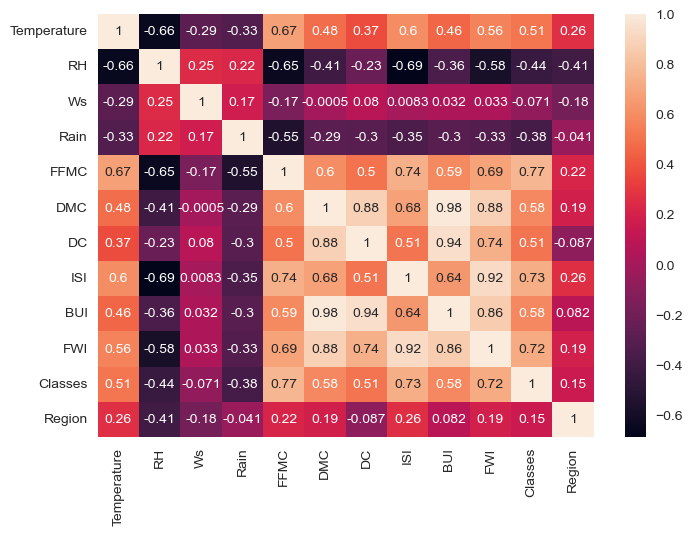

In [145]:
sns.heatmap(df_copy.corr(),annot = True)